## Assignment 1 

Name: Eve Tarpey Date: 21/09/23

### Formulae used in this assignment:

The Rayleigh-Jeans law for the spectrum of a Blackbody:
$$ U(v, T) = \frac{8 \pi v^2}{c^3} kT $$
where 
$ k = 1.38 × 10^{−23} JK^{−1} $
$ c = 3 × 10^{8} ms^{−1} $

Plank's function:
$$ u(v, T) = \frac{8 \pi h v^3}{c^3} \frac{1}{e^\frac{hv}{kT} -1}$$
where 
$ h = 6.63 x 10^{-34} Js $

This can be written in wavelength coordinates:
$$ u(\lambda, T) = \frac{8 \pi h c}{\lambda^{5}} \frac{1}{e^\frac{h c}{\lambda kT} -1}$$

Wien's displacement law:
 $\lambda peakT = constant (c)$
 
Below, I have tasks 1-5 completed!


### Task 1
- Write a program to print the value of U(ν, T) for a user-inputted frequency and temperature. 


- Test with values ν = 1.5 × 1012 Hz and T = 2500K.

In [1]:
import numpy as np                             # import numpy in order to use mathematical operations

# define the constants in order to use them to calculate U, the function of v and T

k = 1.38E-23                                   # the Boltzmann constant, unit J/K
c = 3.0E+8                                     # the speed of light, unit m/s

# allow the user to input frequency (v, unit: Hz) and temperature (T, unit: K) 

v = float(input("Input frequency (Hz): "))     # prompt for the user to input frequncy
T = float(input("Input temperature (K): "))    # prompt for the user to input temperature

# Define the function U(v, T) to calculate energy density (U, Unit: J/m^3)
def U(v, T):                
    U = (k*T)*((8*np.pi*(v**2))/(c**3))        # calculate energy density using the Rayleigh Jean law
    return U                                   # return the calculated result for the energy density

result = U(v, T)                               # call the U function with the inserted values of v and T.

# Display the result, rounded to three significant figures 
print(f"The energy density (U) = {result:.3g} Joules per cubic metre.") 











Input frequency (Hz): 1.5e12
Input temperature (K): 2500
The energy density (U) = 7.23e-20 Joules per cubic metre.


## Task 2
- Develop the program to plot the Rayleigh-Jeans law over a range of frequencies to show that this leads to the Ultraviolet Catastrophe. 


- We will use a temperature of 2500 K and will generate a range of frequencies from 10^10 Hz to 10^15 Hz, with 1000 data points. 


- This range should be suitable for demonstrating the Ultraviolet Catastrophe, as we are using a wide span of frequencies.

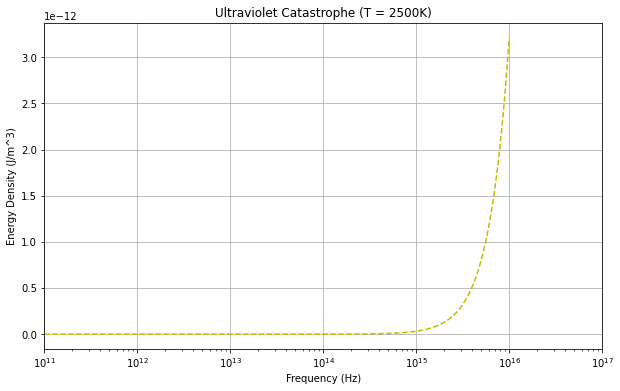

In [36]:
import matplotlib.pyplot as plt                  # we must import matplotlib.pyplot as plt to plot our graph 
%matplotlib inline

k = 1.38E-23                                     # the Boltzmann constant, unit J/K
c = 3.0E+8                                       # the speed of light, unit m/s

v_array = np.linspace(10e10, 10e15, 1000)        # generate an array of frequencies in the range 10e10 to 10e15

T = 2500                                         # Temperature (K)

# calculate energy densities for the range of frequencies
energy_densities = (k*T)*((8*np.pi*(v_array**2))/(c**3))    

plt.figure(figsize=(10, 6))                      # to enlarge the graph

plt.semilogx(v_array, energy_densities,"y--")    # to plot the values 
plt.title(f"Ultraviolet Catastrophe (T = {T}K)") # to title the graph, including the temperature value 
plt.xlabel("Frequency (Hz)")                     # to label the x axis
plt.ylabel("Energy Density (J/m^3)")             # to label the y axis
plt.xlim(10e10, 10e16)                           # to limit the x axis 
plt.grid()                                       # to display a grid on the graph
plt.show()                                       # to show the graph



This code produces a plot showing the energy density as a function of frequency, thus demonstrating the Ultraviolet Catastrophe at 2500 K.

### Task 3
- Plot the wavelength version of Planck’s function for a few temperatures between 2000 and 10000K.



- Consider an appropriate wavelength range - generate an array of wavelengths of range $80x10^{-9}$ to $1800x10^{-9}$, with 10000 data points.

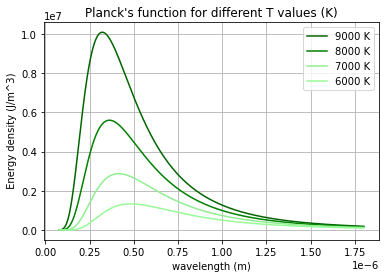

In [131]:
import matplotlib.pyplot as plt                          # we must import matplotlib.pyplot as plt to plot our graph 
%matplotlib inline

# define Planck's constant in order to use them to calculate U_planck, the energy density

h = 6.626e-34                                            # Planck's constant (Js)

# generate an array of wavelengths (Units: m)
wavelength = np.linspace(80*10**-9, 1800*10**-9, 10000)           

# define the Planck function for wavelength (Unit: m)
def Planck(wavelength, temperature):                       
    U_planck = ((8*np.pi*c*h)/(wavelength**5)) * (1/(np.exp((h*c)/(wavelength*k*temperature))- 1))
    return U_planck

# define temperatures in a list
temperatures = [9000, 8000, 7000, 6000]

# Plot Planck's function for different temperatures
for temperature, color in zip(temperatures, ['darkgreen', 'green', 'lightgreen', 'palegreen']):            
    U = Planck(wavelength, temperature)
    plt.plot(wavelength, U, label=f"{temperature} K", color=color)

plt.title("Planck's function for different T values (K)") # to title the graph
plt.xlabel("wavelength (m)")                              # to label the x axis
plt.ylabel(" Energy density (J/m^3)")                     # to label the y axis
plt.legend()                                              # display the T values in a legend in order to differentiate between them
plt.grid()                                                # to display a grid on the graph
plt.show()                                                # to show the graph

The graph allows us to see how the intensity of radiation at different wavelengths changes with temperature. 

### Task 4
- Develop your program to find the peak of the Planck function for each temperature. 


- Evaluate the constant in Wien’s displacement law which gives the peak of the Planck function in wavelength coordinates versus temperature: $\lambda peakT = constant$



- Print the value of the constant for each temperature value. I included 4 significant figures so that the figures are slightly different, and therefore more accurate for each temperature value.



- I also included a graph indicating the peaks.



Wien's Constant (c) at 9000K is 2.9014e-03 JK
-----------------------------------------------
Wien's Constant (c) at 8000K is 2.9010e-03 JK
-----------------------------------------------
Wien's Constant (c) at 7000K is 2.9008e-03 JK
-----------------------------------------------
Wien's Constant (c) at 6000K is 2.9013e-03 JK
-----------------------------------------------

The average value of Wien's Constant is 2.9013e-03 JK
-----------------------------------------------


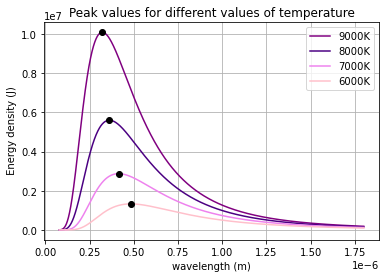

In [111]:
from scipy.signal import find_peaks

# Define a function to calculate Wien's constant using Wien's constant formula
def Wiens(max_wavelength, temperature):
    c = max_wavelength*temperature
    return c

# initialize a list to store Wien's constants
wiens_constants = []

# loop through each temperature
for temperature, color in zip(temperatures, ['purple', 'indigo', 'violet', 'pink']):                         
    
    # calculate the Planck function for the temperature and wavelength ranges. 
    U = Planck(wavelength, temperature)   
    
    # specify the color and plot U (Energy density) as a function of wavelength 
    plt.plot(wavelength, U, label=f"{temperature}K", color=color) 
    
    peaks, _ = find_peaks(U, height=0.3)                     # find the peaks
    plt.plot(wavelength[peaks], U[peaks], "ko")              # plot the peaks and mark them
    
    # calculate and print the Wien's constant for each temperature
    Wien_c = Wiens(wavelength[peaks][0], temperature)        
    print(f"Wien's Constant (c) at {temperature}K is {Wien_c:.4e} JK")
    print("-----------------------------------------------")
# append the Wien's constant to the list
wiens_constants.append(Wien_c)

# Calculate and print the average of Wien's constants
avg_wiens_constant = sum(wiens_constants) / len(wiens_constants)
print(f"\nThe average value of Wien's Constant is {avg_wiens_constant:.4e} JK")
print("-----------------------------------------------")

# append the Wien's constant to the list
plt.title("Peak values for different values of temperature") # to title the graph
plt.xlabel("wavelength (m)")                                 # to label the x axis
plt.ylabel(" Energy density (J)")                            # to label the y axis
plt.legend()                                                 # display the temperature values in a legend in order to differentiate between them 
plt.grid()                                                   # to display a grid on the graph
plt.show()                                                   # to show the graph

### Task 5

- Carry out a numerical integration of the Planck function for a few temperatures to verify that the area under the curve is proportional to $T^{4}$ in Stefan-Boltzmann law. 

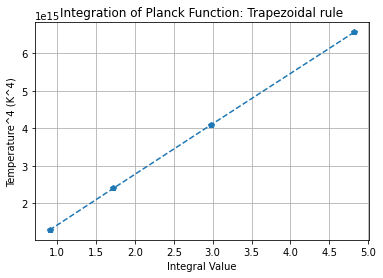

The values of the trapezoidal rule integration of Planck's function: 
[4.81850733475933, 2.9798426667799385, 1.7212105267615787, 0.9068634114250497]


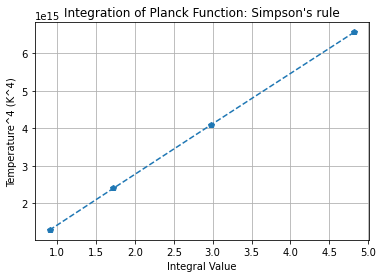

The values of Simpson's integration of Planck's function: 
[4.81850733710623, 2.9798426676407095, 1.7212105273314426, 0.9068634118384737]


In [135]:
from scipy import integrate

# initialize an empty list to store the integrals calculated using the trapezoidal rule and Simpson's rule.
integral_trapezoidal_values = []
integral_simpson_values = []

for temp in temperatures:
    U_wavelength = Planck(wavelength, temp)                                          
    integral_trapezoidal = integrate.trapezoid(U_wavelength, wavelength)

    # Calculate the integral using trapezoidal rule
    integral_trapezoidal = integrate.trapz(U_wavelength, wavelength)
    integral_trapezoidal_values.append(integral_trapezoidal)
    
    # Calculate the integral using Simpson's rule
    integral_simpson = integrate.simps(U_wavelength, wavelength)
    integral_simpson_values.append(integral_simpson)

# Plot the results from the trapezoidal rule integration, with T^4 as a function of the integrals
plt.plot(integral_trapezoidal_values, [temp**4 for temp in temperatures], "p--")      # plot the graph
plt.title("Integration of Planck Function: Trapezoidal rule")                         # to title to the graph
plt.xlabel("Integral Value")                                                          # to label the x-axis
plt.ylabel("Temperature^4 (K^4)")                                                     # to label the y-axis
plt.grid()                                                                            # display a grid on the graph
plt.show()                                                                            # to show the graph, show the points

print("The values of the trapezoidal rule integration of Planck's function: ")         
print(integral_trapezoidal_values)                                                    # print the values 

plt.plot(integral_simpson_values, [temp**4 for temp in temperatures], "p--")          # plot the graph, show the points
plt.title("Integration of Planck Function: Simpson's rule")                           # to title to the graph
plt.xlabel("Integral Value")                                                          # to label the x-axis
plt.ylabel("Temperature^4 (K^4)")                                                     # to label the y-axis
plt.grid()                                                                            # display a grid on the graph
plt.show()                                                                            # to show the graph

print("The values of Simpson's integration of Planck's function: ")
print(integral_simpson_values)                                                        # print the values
